    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/Documents/Research Professor/Mikhail Erementchouk/HN_V2/Project.toml`
  [c8e1da08] + IterTools v1.10.0
    Updating `~/Documents/Research Professor/Mikhail Erementchouk/HN_V2/Manifest.toml`
  [c8e1da08] + IterTools v1.10.0


In [1]:
include("intro.jl")

using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using HNProcess
using DataRefine
using PartitioningData
using IterTools
using Random
using RSGraphics
using LaTeXStrings

Currently active project is: HN_V2

Path of active project: C:\Users\qz202\OneDrive\Documents\Research Professor\Mikhail Erementchouk\HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



In [2]:
# Testing function for making hadamard matrices using Sylvester's construction
function hadamard_gen_TEST(n::Int)
    if !(n % 4 == 0 || n == 1 || n == 2)
        throw("argument must be divisible by 4 (or equal to 1 or 2)")
    end
    k = log(2,n)
    global H = [1]
    for i in 1:k
        r1 = hcat(H,H)
        r2 = hcat(H,-1 .* H)
        H_n = vcat(r1,r2)
        H = H_n
    end
    
    return H
end

hadamard_gen_TEST (generic function with 1 method)

In [3]:
println(Integer(log(16)/log(2)))

t = @elapsed had = hadamard_gen_TEST(1024)

println(t)
#=
pretty_table(had)
s_1 = 4
s_2 = 4
ims = []
for r in eachrow(had)
    i = reshape(r,s_1,s_2)
    push!(ims, i)
    #pretty_table(i)
end
println(length(ims)) =#

4
0.215496333


In [4]:
# uses hadamard_gen to make lists of images
function orthogonal_image_generator(n::Int)::Vector{Matrix{Int64}}
    had = hadamard_gen(n)
    s =  Integer(sqrt(size(had,1)))
    ims = []
    for r in eachrow(had)
        i = reshape(r,s,s)
        push!(ims, i)
    end
    return ims
end

function orthogonal_image_generator(hada::Matrix)::Vector{Matrix{Int64}}
    had = hada
    s =  Integer(sqrt(size(had,1)))
    ims = []
    for r in eachrow(had)
        i = reshape(r,s,s)
        push!(ims, i)
    end
    return ims
end



orthogonal_image_generator (generic function with 2 methods)

In [5]:
images = Dict(
    "i1"  => [
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
    ],
    
    "i2" => [
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
    ],
    
    "i3"  => [
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
    ],
    
    "i4" => [
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
    ],

    "i5" => [
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
    ],

    "i6" => [
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        1 1 -1 -1 1 1 -1 -1;
    ] 
    
)

Dict{String, Matrix{Int64}} with 6 entries:
  "i5" => [1 1 … -1 -1; 1 1 … -1 -1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i4" => [1 1 … -1 -1; 1 1 … -1 -1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i3" => [-1 -1 … 1 1; -1 -1 … 1 1; … ; 1 1 … -1 -1; 1 1 … -1 -1]
  "i1" => [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1]
  "i2" => [-1 -1 … 1 1; -1 -1 … 1 1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i6" => [1 1 … -1 -1; -1 -1 … 1 1; … ; -1 -1 … 1 1; 1 1 … -1 -1]

In [2]:
function HN_Solver_Traj_test(parameters::Dict{String, Any}, initial_state::Dice.Hybrid, debug::Bool = false)
    # Just gets raw result, no visualizer

    scaling = parameters["scaling"] #Scaling coeff
    S = parameters["images"] # Images
    time_total= parameters["sim_time"] # how long the sim is
    num_steps = parameters["steps"] # number of steps in the sim
    dt_sim = parameters["delta"] # dt
    delta_t = time_total/num_steps
    traj_collection::Vector{Vector{Dice.Hybrid}} = []

    # Make Graph
    graph_set = get_HN_graph(S, scaling)
    
    # Making model
    model = Dice.Model(graph_set, Dice.model_2_hybrid_coupling, delta_t)

    # Making randomized initial state
    num_vertices = Graphs.nv(model.graph)
    
    converged = 0
    diverged = 0


    pinned::Vector{Tuple{Int64, Int8}} = []
    state::Dice.Hybrid = Dice.get_random_hybrid(num_vertices, 2.0)
    #println(reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
    for stim in parameters["initial_stimuli"]
        # Every n entries is a column, thus taking # of columns and subtracting 1 brings you to where the column begins
        # Adding 1 will bring you to the first entry in the column and so on for +k
        pos = (stim[2]-1) * size(parameters["images"][1],1) + stim[1]
        state[1][pos] = stim[3]
        push!(pinned, (pos, stim[3]))
    end
    #println(state[1]
    traj = Dice.trajectories_pinned(model.graph, num_steps, dt_sim, model.coupling, state, pinned)
    push!(traj_collection, traj)
    # Comment out the other part of the or conditional to ignore negative images
 #=   if (reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
        -1 .*reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
        converged += 1
        global sol = state[1]
        break
    end =#

    
    if debug
        pretty_table(reshape(traj[end][1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
    end
    return(state,traj_collection)
end    

HN_Solver_Traj_test (generic function with 2 methods)

In [3]:
sim_time = 4
steps = 3000
im_all = orthogonal_image_generator(64)
im_all_vec = vec.(im_all)
println(length(im_all))
selected::Vector{Matrix{Int64}} = []
#sl::Vector{Int64}=shuffle(1:64)[1:7] #random
sl::Vector{Int64}=[2,3,25,27,45,34,17,30,7,10,46,62,63] #random, 13 images
for t in sl
    push!(selected, im_all[t])
end
parameters = Dict{String, Any}(
    "images" => selected,
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
println(length(parameters["images"]))
@show length(parameters["images"])
 m = filter(x -> !(x in sl), 1:64)
@show m
 f = filter(x -> x in sl, 1:64)
@show f

64
13
length(parameters["images"]) = 13
m = [1, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64]
f = [2, 3, 7, 10, 17, 25, 27, 30, 34, 45, 46, 62, 63]


13-element Vector{Int64}:
  2
  3
  7
 10
 17
 25
 27
 30
 34
 45
 46
 62
 63

In [4]:
i_s = (Int8[-1, -1, -1, -1, 1, 1, 1, 1, 1, -1  …  1, 1, -1, 1, 1, -1, 1, -1, -1, -1], [0.863760406429569, -0.4850284680524264, 0.00505531050574648, 0.02560400863586154, -0.8550692880633033, -0.545113069182197, -0.3851114017578354, -0.5269852592575819, 0.41422724730175764, 0.16982268056401084  …  -0.11293684596323539, 0.7698020609333696, 0.48319648724068975, 0.6967937355264953, 0.19484438047786523, 0.8157376494059392, 0.38439270533754266, -0.8757151428748629, -0.6461360634266666, -0.010672404008662983])

LoadError: UndefVarError: `…` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [264]:
#Running
res = HN_Solver_Traj_test(parameters, i_s);
save_trajectories(res[2], "8by8","len8_t3")

File 8by8_1_len8_t3.dat is generated


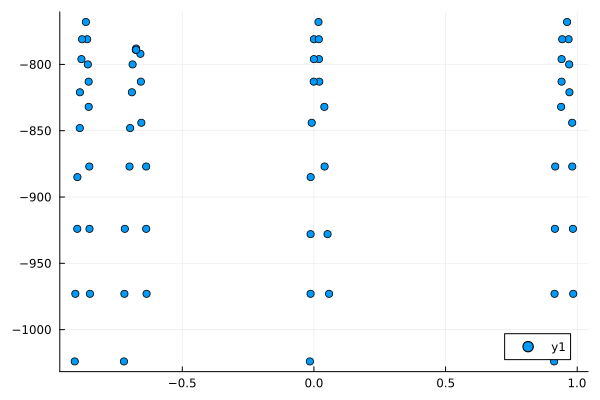

In [67]:
# Graphing
res = (Int8[1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1], [0.0, -0.7183012985630894, -0.6371439092891291, 0.05753146591435433, -0.9061720895744284, 0.9695048070103388, 0.9164641579762232, -0.8887605605097567, 0.9671944560536829, -0.8830300143497761, -0.8531342317211432, 0.9389518448766258, -0.6914210877941446, 0.020312200177247858, -0.012727519221094608, -0.7003730422965518, 0.9152494056424748, -0.889396984700058, -0.8661894170758115, 0.9808750537436255, -0.6372070684954692, 0.03961772181159281, -0.008422307252950054, -0.6766129345117048, -0.012698290850075997, -0.6887910578329309, -0.6591295525129266, 0.018914975338735224, -0.8555608759987718, 0.9405552839596423, 0.9848612918441924, -0.8613282670963817, 0.017312079303567724, -0.6753820086870913, -0.6980178992810978, -6.61222623287612e-5, 0.9123590580514178, -0.858800653244782, -0.8988893927269361, 0.9614922812804875, -0.8556382003107115, 0.9406901782427312, 0.9811165750829667, -0.8506118880225971, -0.7216916213781895, 0.04052634418174051, -0.0008279077422398209, -0.6573242950369397, -0.8984091709895616, 0.9704533342380414, 0.9139480483797527, -0.8807020439408192, -0.6556175413926091, -0.01241878132783246, 0.018503967274253658, -0.6752085346685888, -0.015424226222456129, -0.6356674925366671, -0.719841436485857, 0.051669141169142944, 0.9837025265104691, -0.8524088422004543, -0.9084619758941966, 0.9430612687365056])
    rot = iterative_rotater_state(res,parameters)
    g = get_HN_graph(parameters["images"],parameters["scaling"])
    binary = [i[1] for i in rot]
    x = res[2]
    y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
    p = scatter(x,y)

FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3

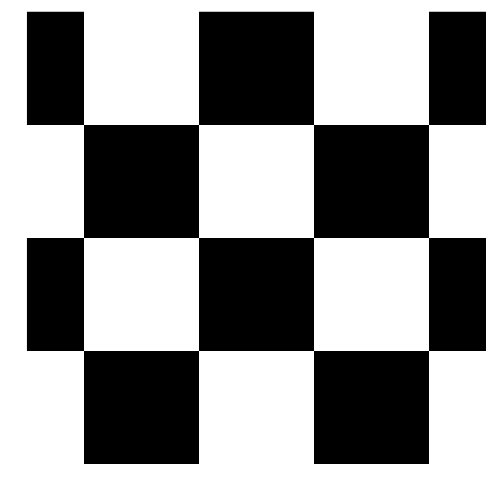

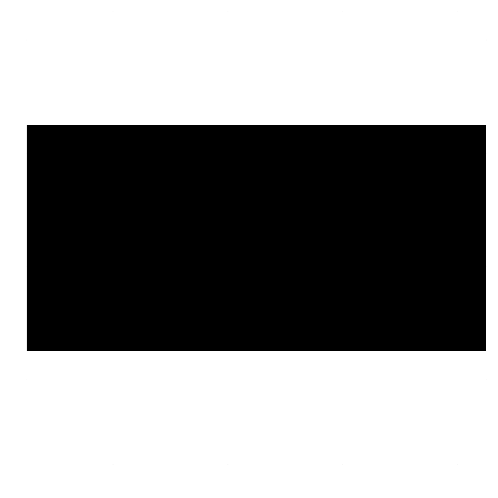

LOWEST


LoadError: MethodError: no method matching realign_hybrid(::Vector{Int8}, ::Int64)
The function `realign_hybrid` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  realign_hybrid([91m::Tuple{Vector{Int8}, Vector{Float64}}[39m, ::Any)
[0m[90m   @[39m [36mDice[39m [90mC:\Users\qz202\Downloads\Share to Windows\Share to Windows\Research Professor\Mikhail Erementchouk\Dice\src\[39m[90m[4mDice.jl:1248[24m[39m
[0m  realign_hybrid([91m::Tuple{Vector{Int8}, Vector{Float64}}[39m)
[0m[90m   @[39m [36mDice[39m [90mC:\Users\qz202\Downloads\Share to Windows\Share to Windows\Research Professor\Mikhail Erementchouk\Dice\src\[39m[90m[4mDice.jl:1248[24m[39m


In [68]:
k = sol_finder(res, parameters, true)
l = 0
println("SOLS")
for i in k
    l+=1
    binary_image_visualizer(reshape(i[1],8,8),500,"image_sols_t4_$(l)_t1",sav= false,d= true)
end
println("LOWEST")
k = lowest_cut_states(res[1], parameters)
l=0
for i in k
    l+=1
    binary_image_visualizer(reshape(i[1],8,8),500,"image_grounds_t4_$(l)_t1",sav= false,d= true)
end

In [269]:
s_0 = i_s

(Int8[-1, -1, -1, -1, 1, 1, 1, 1, 1, -1  …  1, 1, -1, 1, 1, -1, 1, -1, -1, -1], [0.863760406429569, -0.4850284680524264, 0.00505531050574648, 0.02560400863586154, -0.8550692880633033, -0.545113069182197, -0.3851114017578354, -0.5269852592575819, 0.41422724730175764, 0.16982268056401084  …  -0.11293684596323539, 0.7698020609333696, 0.48319648724068975, 0.6967937355264953, 0.19484438047786523, 0.8157376494059392, 0.38439270533754266, -0.8757151428748629, -0.6461360634266666, -0.010672404008662983])

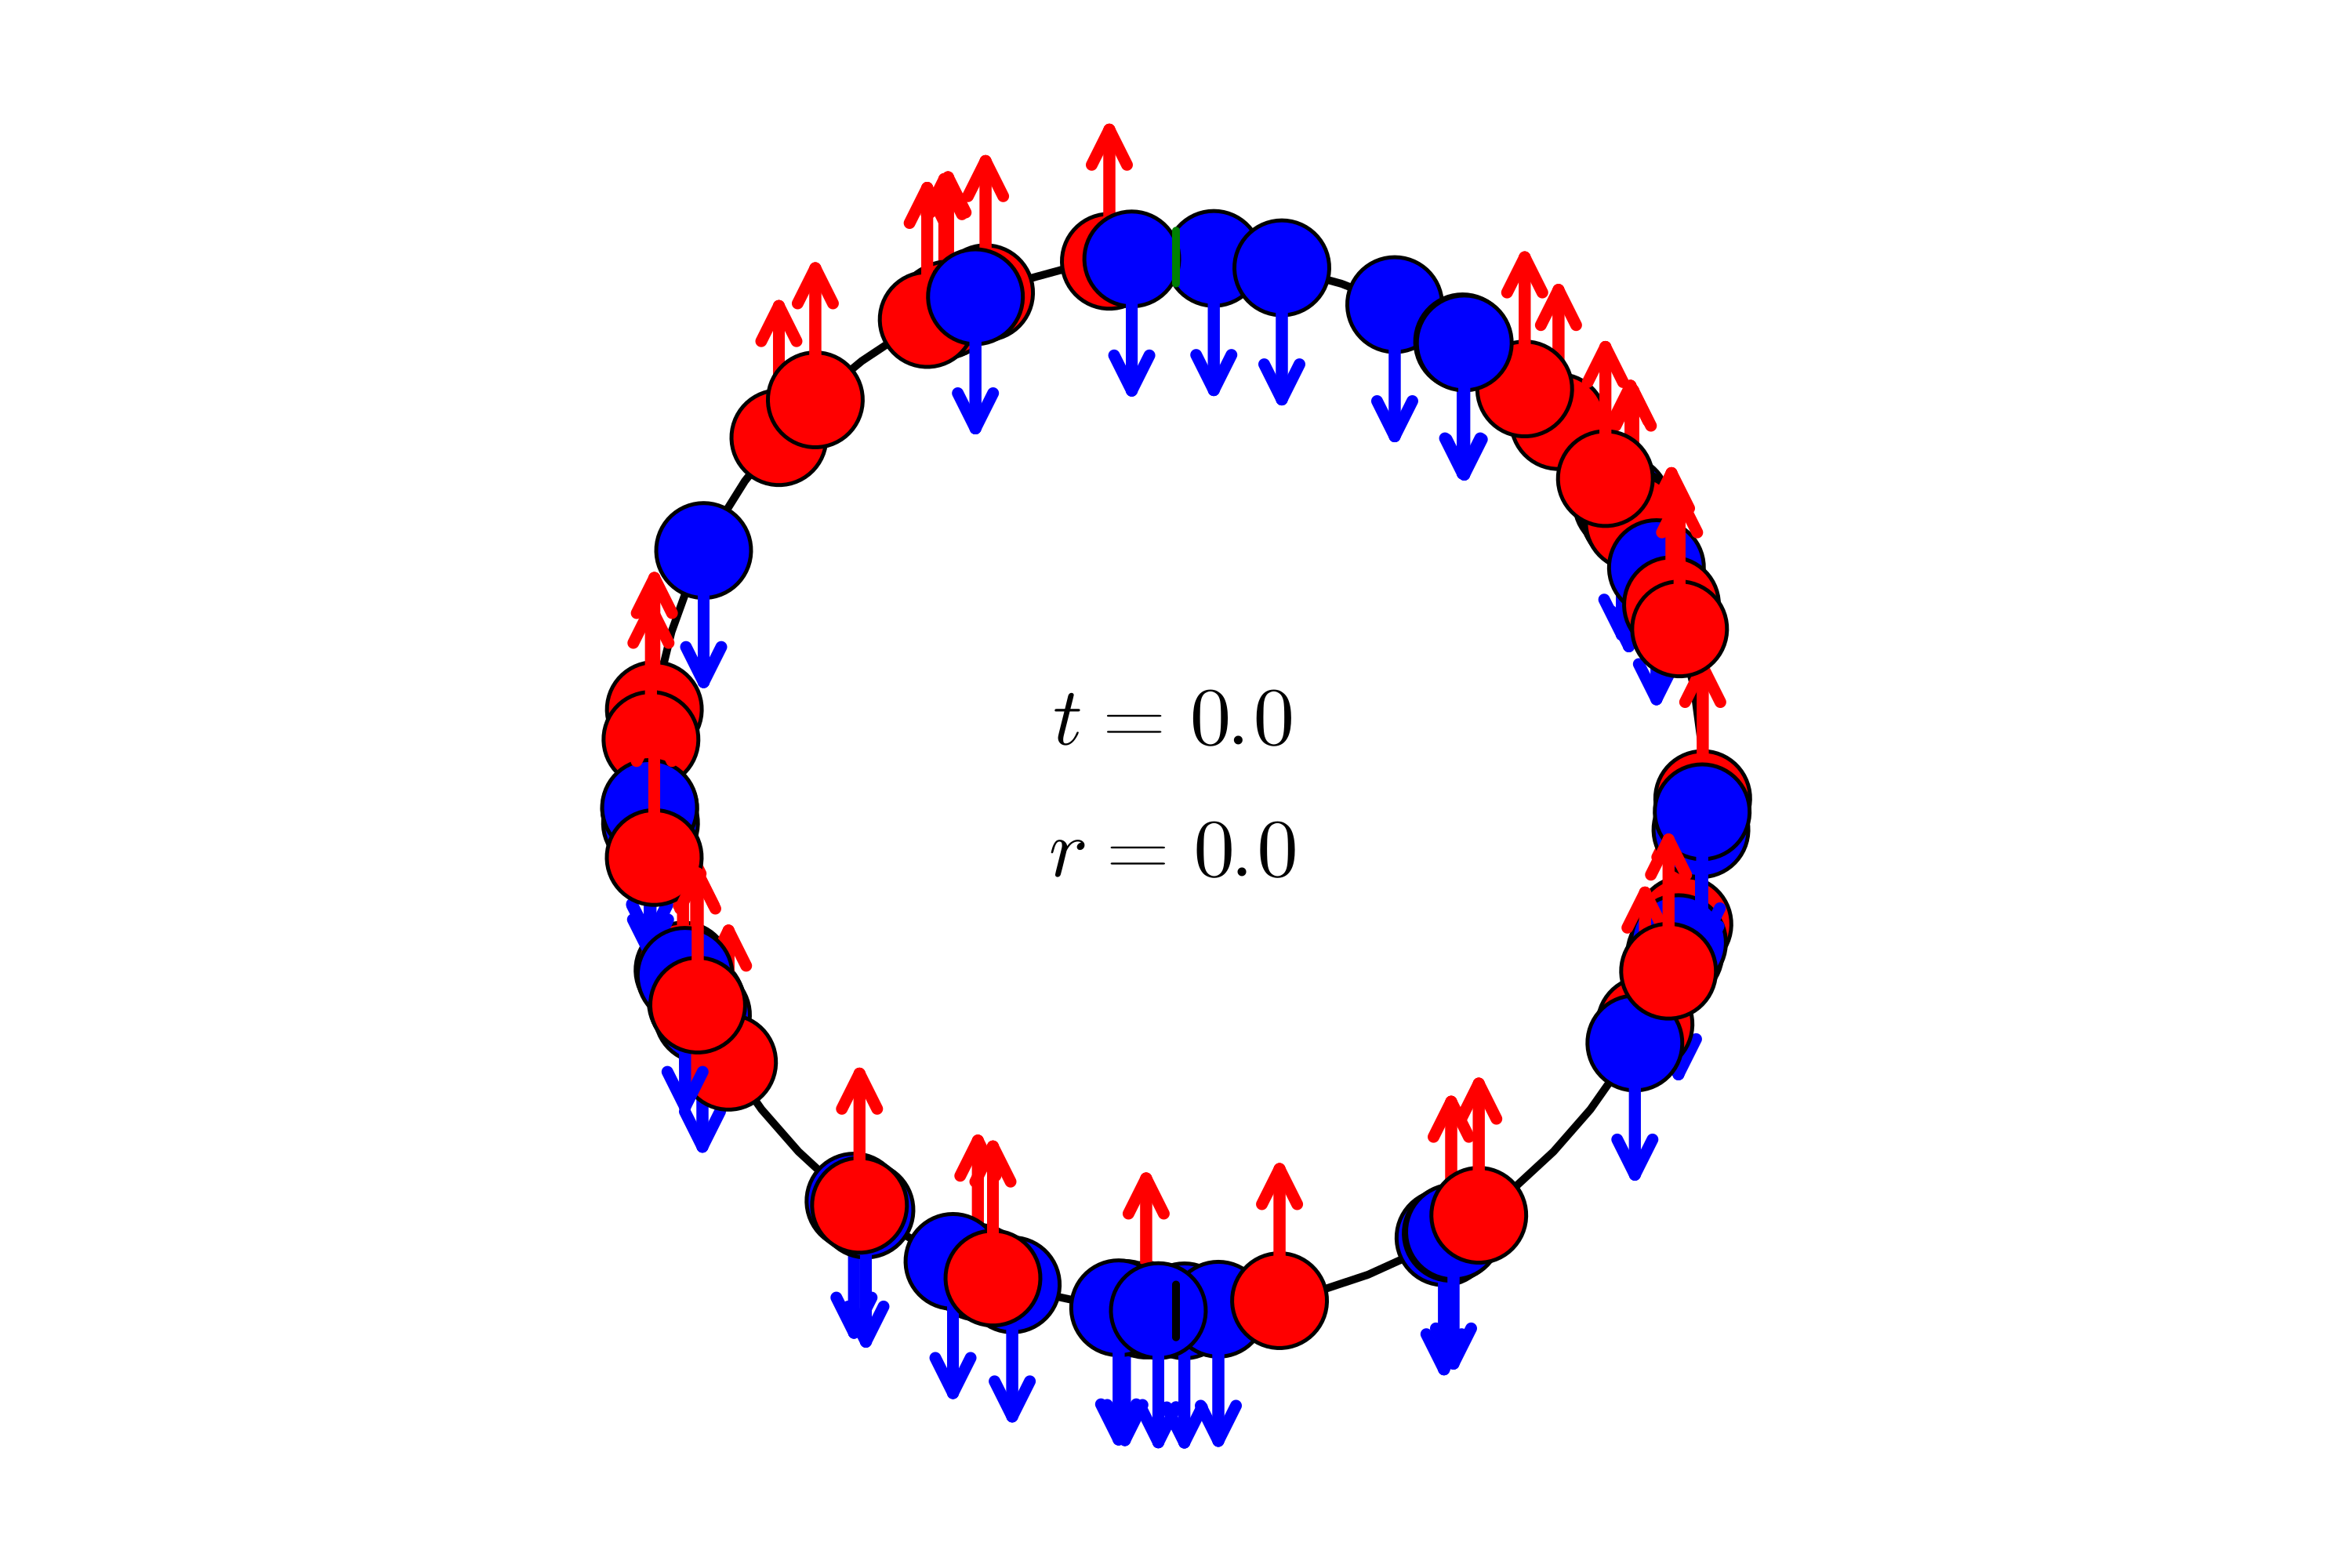

In [274]:
p0 = make_circle()
add_state(s_0[1], s_0[2])
RSGraphics.show_dash(0.0, 0.1)

# optional annotations can be added
t_label_x = 0.0
t_label_y = 0.125
t_label_str = "t = $(round(0.0, digits = 2))"
annotate!(t_label_x, t_label_y, latexstring(t_label_str))

r_label_x = 0.0
r_label_y = -0.125
r_label_str = "r = $(round(0.0, digits = 2))"
annotate!(r_label_x, r_label_y, latexstring(r_label_str))
RSGraphics.show_dash(1.0, 0.1, :green)

plot!(p0, dpi = 500)


In [275]:
savefig(p0, "Initial_State_ortho_trials_t4_p0.png")

"C:\\Users\\qz202\\OneDrive\\Documents\\Research Professor\\Mikhail Erementchouk\\HN_V2\\scripts\\Initial_State_ortho_trials_t4_p0.png"

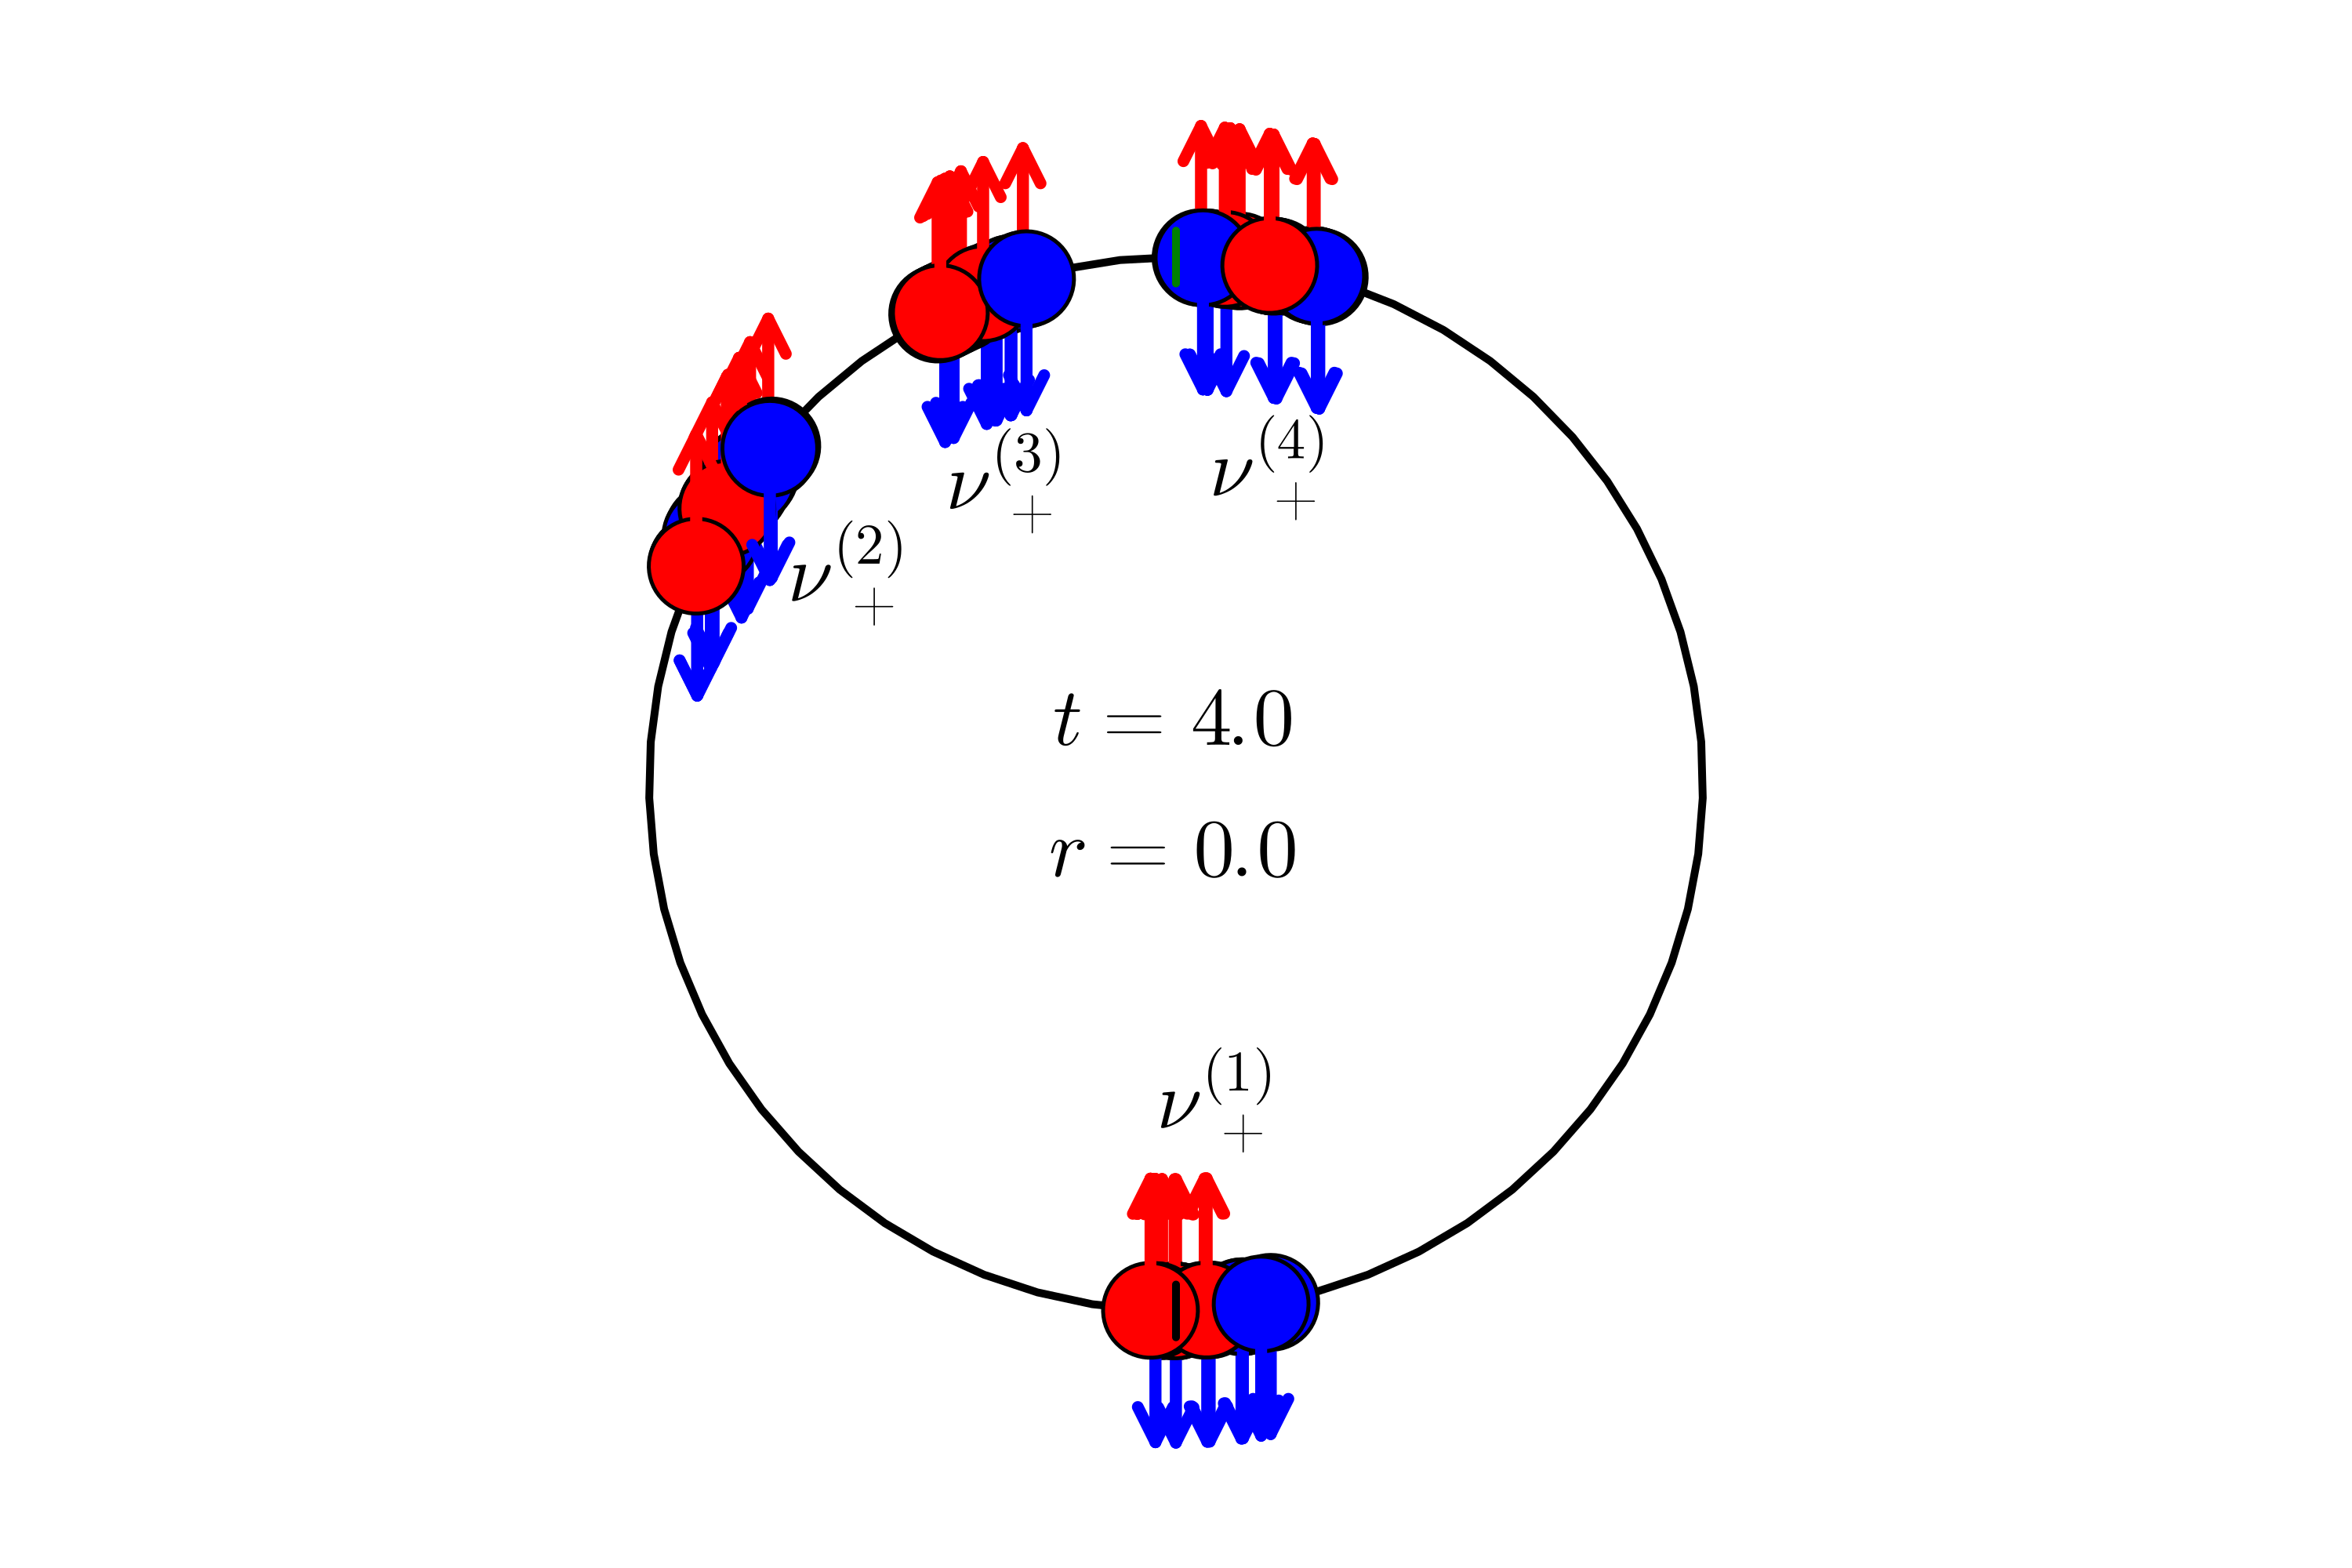

In [7]:
p1 = make_circle()

res = (Int8[1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1], [0.0, -0.7183012985630894, -0.6371439092891291, 0.05753146591435433, -0.9061720895744284, 0.9695048070103388, 0.9164641579762232, -0.8887605605097567, 0.9671944560536829, -0.8830300143497761, -0.8531342317211432, 0.9389518448766258, -0.6914210877941446, 0.020312200177247858, -0.012727519221094608, -0.7003730422965518, 0.9152494056424748, -0.889396984700058, -0.8661894170758115, 0.9808750537436255, -0.6372070684954692, 0.03961772181159281, -0.008422307252950054, -0.6766129345117048, -0.012698290850075997, -0.6887910578329309, -0.6591295525129266, 0.018914975338735224, -0.8555608759987718, 0.9405552839596423, 0.9848612918441924, -0.8613282670963817, 0.017312079303567724, -0.6753820086870913, -0.6980178992810978, -6.61222623287612e-5, 0.9123590580514178, -0.858800653244782, -0.8988893927269361, 0.9614922812804875, -0.8556382003107115, 0.9406901782427312, 0.9811165750829667, -0.8506118880225971, -0.7216916213781895, 0.04052634418174051, -0.0008279077422398209, -0.6573242950369397, -0.8984091709895616, 0.9704533342380414, 0.9139480483797527, -0.8807020439408192, -0.6556175413926091, -0.01241878132783246, 0.018503967274253658, -0.6752085346685888, -0.015424226222456129, -0.6356674925366671, -0.719841436485857, 0.051669141169142944, 0.9837025265104691, -0.8524088422004543, -0.9084619758941966, 0.9430612687365056])
add_state(res[1], res[2])
RSGraphics.show_dash(0.0, 0.1)

# optional annotations can be added
t_label_x = 0.0
t_label_y = 0.125
t_label_str = "t = $(round(4.0, digits = 2))"
annotate!(t_label_x, t_label_y, latexstring(t_label_str))

r_label_x = 0.0
r_label_y = -0.125
r_label_str = "r = $(round(0.0, digits = 2))"
annotate!(r_label_x, r_label_y, latexstring(r_label_str))

V1_label_x = 0.1
V1_label_y = -0.6
V1_label_str = L"""\nu^{(1)}_+"""
annotate!(V1_label_x, V1_label_y, latexstring(V1_label_str))

V2_label_x = -0.6
V2_label_y = 0.4
V2_label_str = L"""\nu^{(2)}_+"""
annotate!(V2_label_x, V2_label_y, latexstring(V2_label_str))

V3_label_x = -0.3
V3_label_y = 0.575
V3_label_str = L"""\nu^{(3)}_+"""
annotate!(V3_label_x, V3_label_y, latexstring(V3_label_str))

V4_label_x = 0.2
V4_label_y = 0.6
V4_label_str = L"""\nu^{(4)}_+"""
annotate!(V4_label_x, V4_label_y, latexstring(V4_label_str))

RSGraphics.show_dash(1.0, 0.1, :green)

plot!(p1, dpi = 500)

In [8]:
savefig(p1, "Initial_State_ortho_trials_t4_p1_base.png")

"C:\\Users\\qz202\\OneDrive\\Documents\\Research Professor\\Mikhail Erementchouk\\HN_V2\\scripts\\Initial_State_ortho_trials_t4_p1_base.png"

res[1] = Int8[1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1]
res_new = Any[(Int8[1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1], [0.0, -0.7183012985630892, -0.6371439092891293, 0.05753146591435421, -0.9061720895744285, 0.9695048070103391, 0.9164641579762232, -0.8887605605097573, 0.9671944560536829, -0.8830300143497762, -0.8531342317211434, 0.9389518448766259, -0.6914210877941445, 0.020312200177247774, -0.012727519221094497, -0.700373042296552, 0.9152494056424749, -0.889396984700058, -0.8661894170758115, 0.9808750537436257, -0.6372070684954689, 0.03961772181159251, -0.008422307252950123, -0.6766129345117049, -0.0126982908500759, -0.6887910

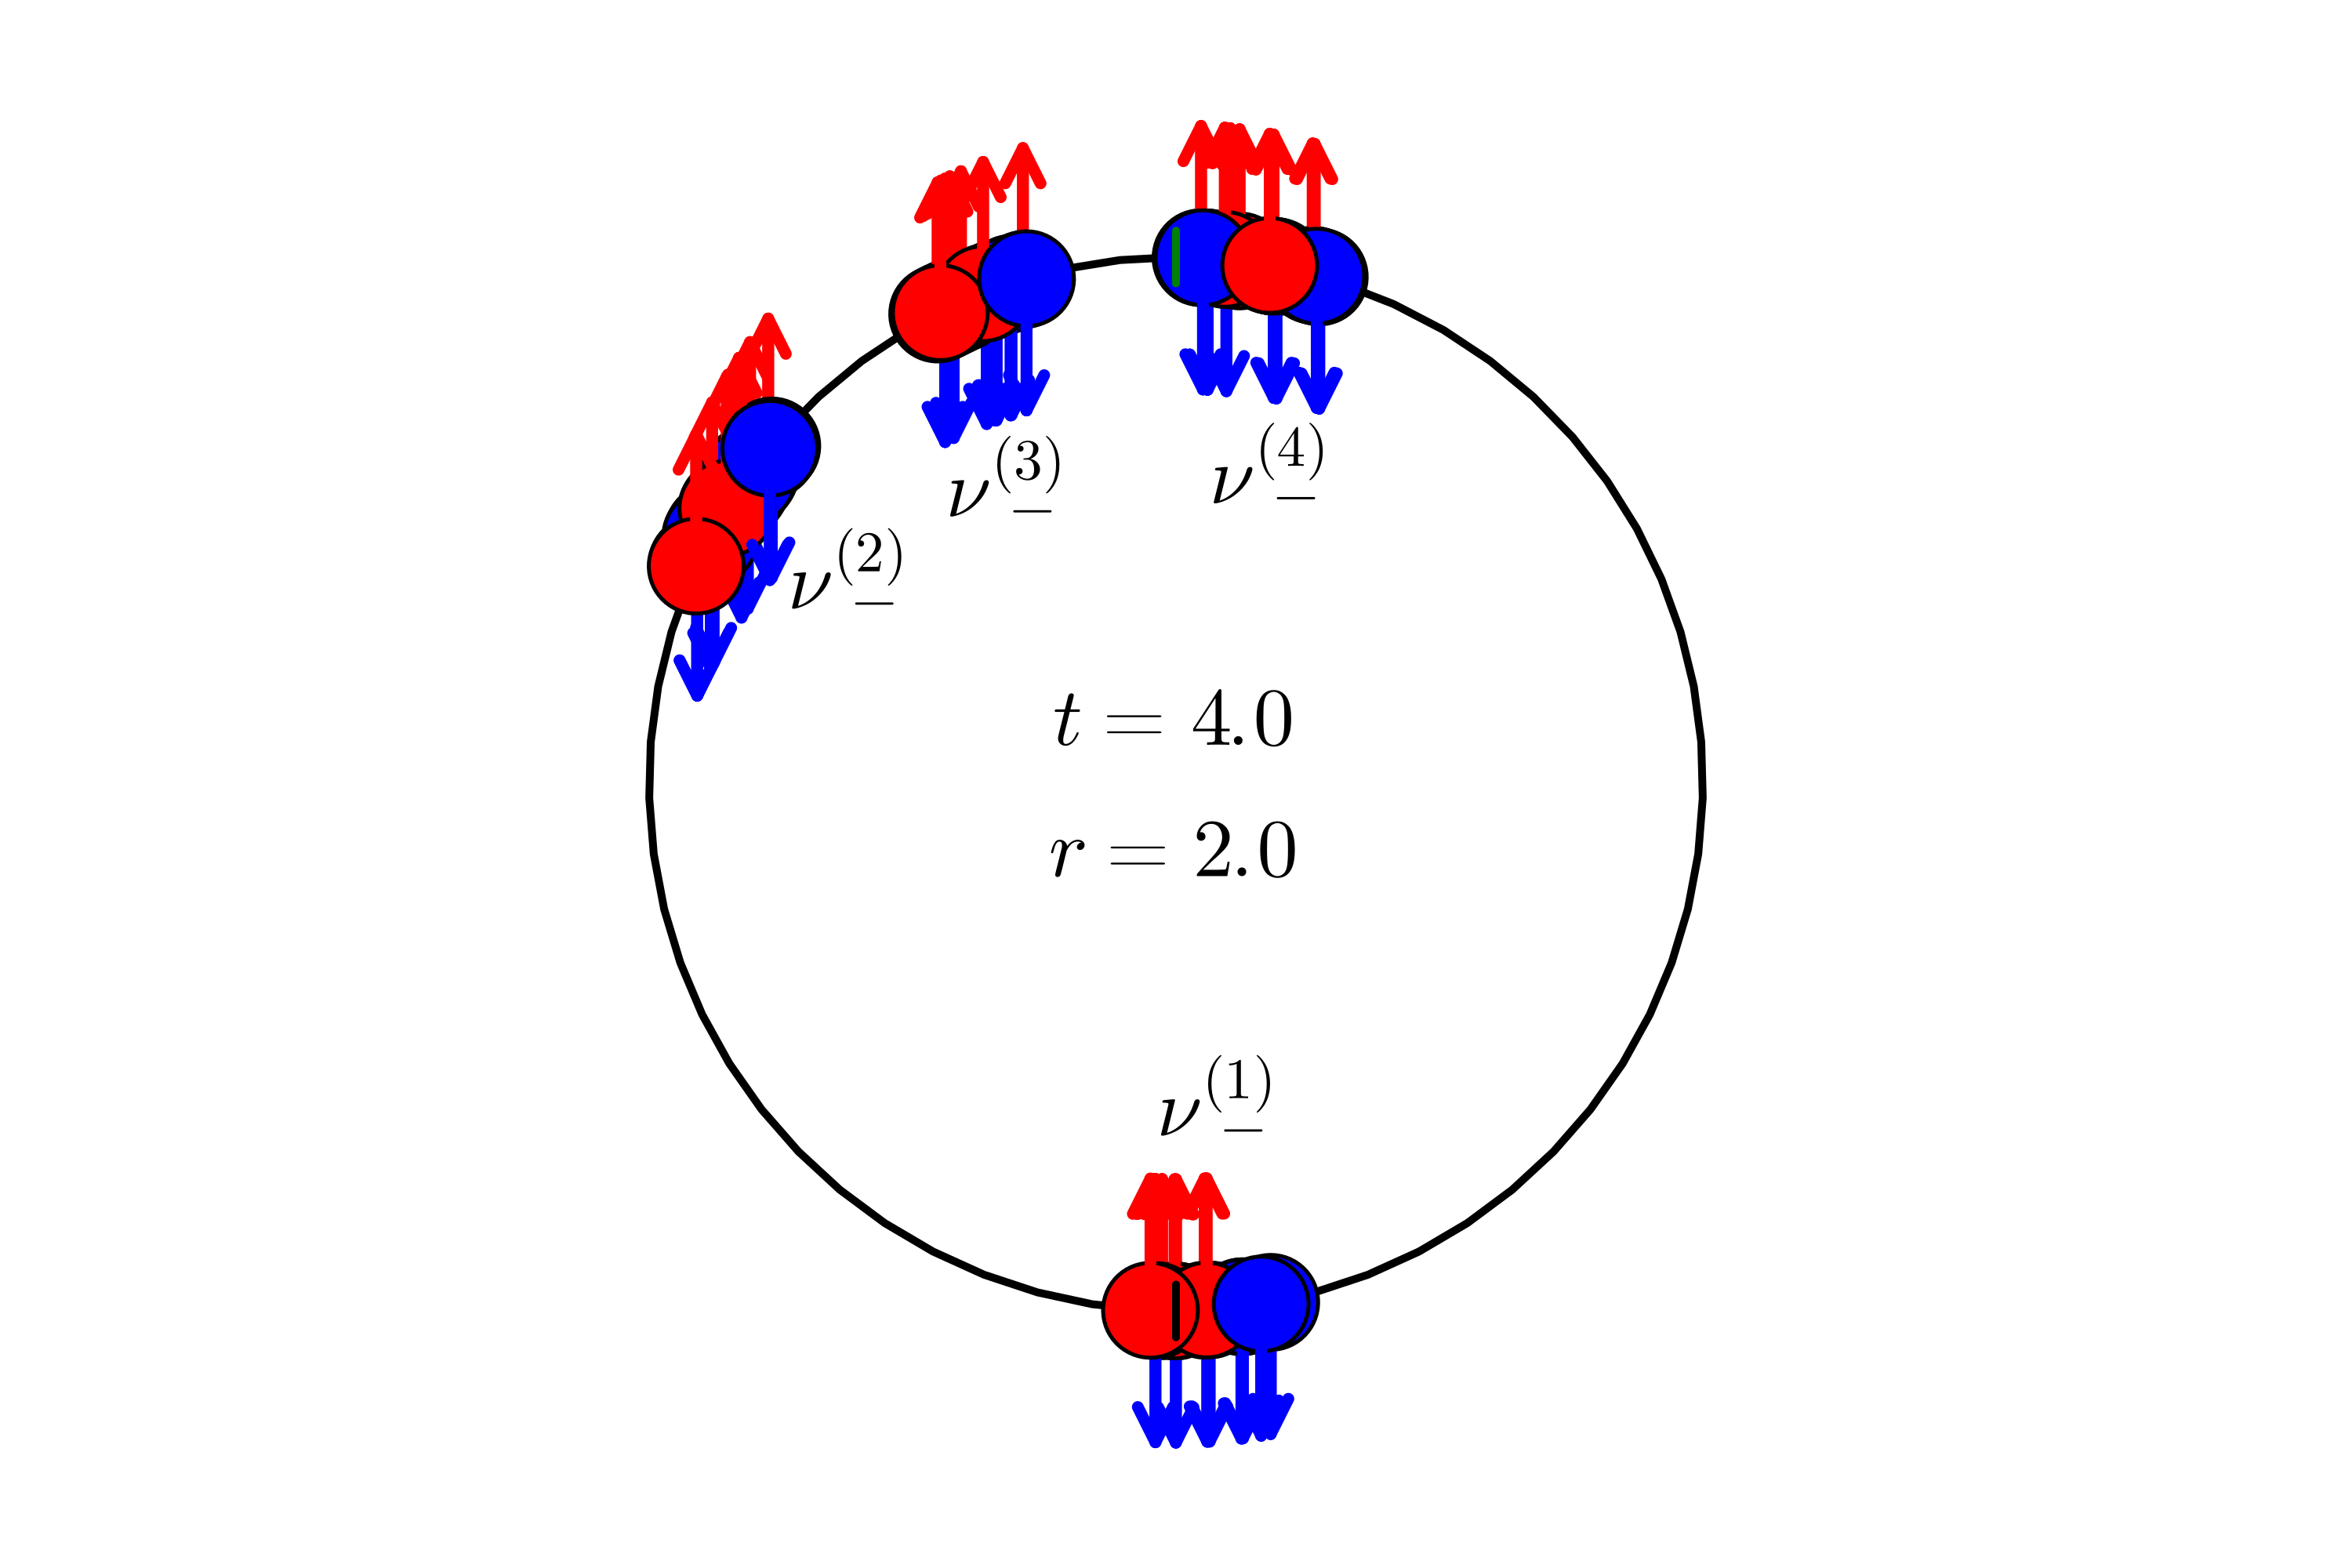

In [71]:
p2 = make_circle()
res_new = iterative_rotater_list(res, [3.0], 16)
@show res[1]
@show res_new
add_state(res_new[1][1], res_new[1][2])
RSGraphics.show_dash(0.0, 0.1)

# optional annotations can be added
t_label_x = 0.0
t_label_y = 0.125
t_label_str = "t = $(round(4.0, digits = 2))"
annotate!(t_label_x, t_label_y, latexstring(t_label_str))

r_label_x = 0.0
r_label_y = -0.125
r_label_str = "r = $(round(2.0, digits = 2))"
annotate!(r_label_x, r_label_y, latexstring(r_label_str))

V1_label_x = 0.1
V1_label_y = -0.6
V1_label_str = L"""\nu^{(1)}_-"""
annotate!(V1_label_x, V1_label_y, latexstring(V1_label_str))

V2_label_x = -0.6
V2_label_y = 0.4
V2_label_str = L"""\nu^{(2)}_-"""
annotate!(V2_label_x, V2_label_y, latexstring(V2_label_str))

V3_label_x = -0.3
V3_label_y = 0.575
V3_label_str = L"""\nu^{(3)}_-"""
annotate!(V3_label_x, V3_label_y, latexstring(V3_label_str))

V4_label_x = 0.2
V4_label_y = 0.6
V4_label_str = L"""\nu^{(4)}_-"""
annotate!(V4_label_x, V4_label_y, latexstring(V4_label_str))

RSGraphics.show_dash(1.0, 0.1, :green)

plot!(p2, dpi = 500)

In [65]:
savefig(p2, "Initial_State_ortho_trials_t4_p2_rotate_4.png")

"C:\\Users\\qz202\\OneDrive\\Documents\\Research Professor\\Mikhail Erementchouk\\HN_V2\\scripts\\Initial_State_ortho_trials_t4_p2_rotate_4.png"

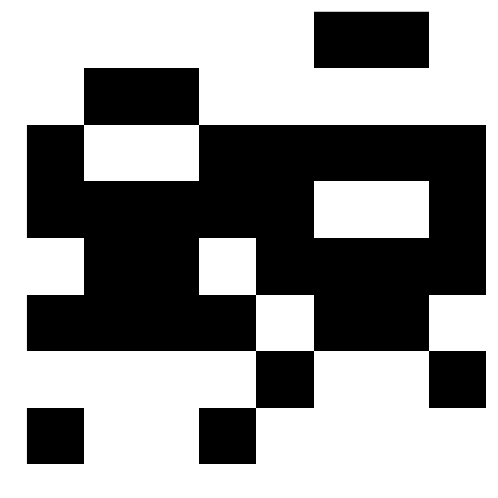

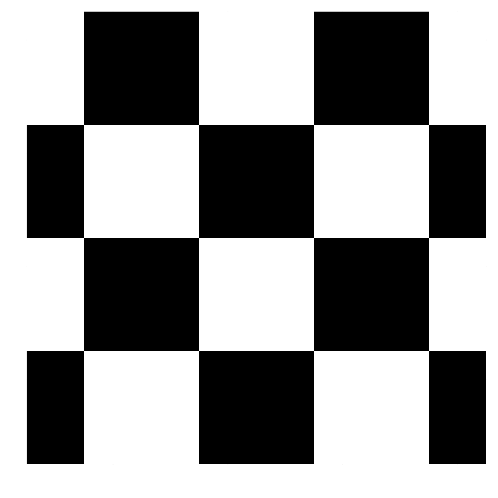

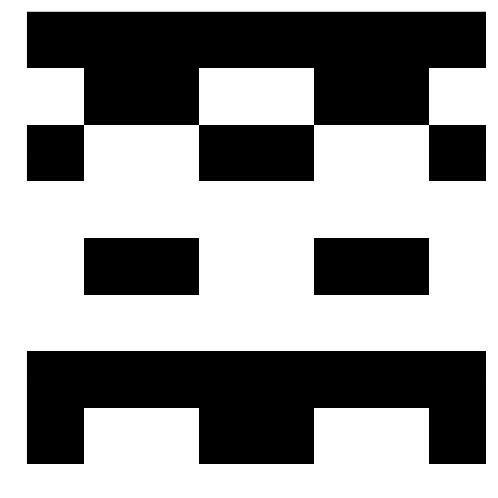

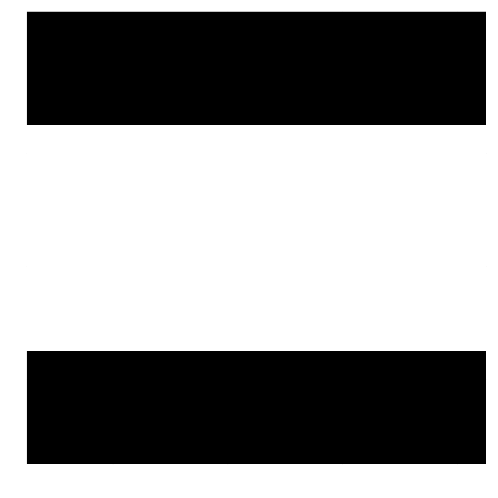

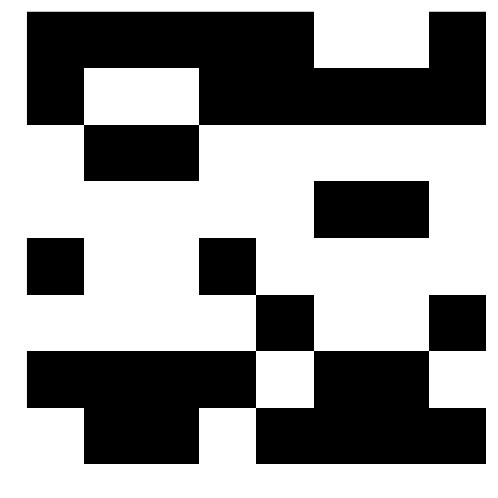

In [73]:
term_s = (Int8[1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1], [0.0, -0.7183012985630894, -0.6371439092891291, 0.05753146591435433, -0.9061720895744284, 0.9695048070103388, 0.9164641579762232, -0.8887605605097567, 0.9671944560536829, -0.8830300143497761, -0.8531342317211432, 0.9389518448766258, -0.6914210877941446, 0.020312200177247858, -0.012727519221094608, -0.7003730422965518, 0.9152494056424748, -0.889396984700058, -0.8661894170758115, 0.9808750537436255, -0.6372070684954692, 0.03961772181159281, -0.008422307252950054, -0.6766129345117048, -0.012698290850075997, -0.6887910578329309, -0.6591295525129266, 0.018914975338735224, -0.8555608759987718, 0.9405552839596423, 0.9848612918441924, -0.8613282670963817, 0.017312079303567724, -0.6753820086870913, -0.6980178992810978, -6.61222623287612e-5, 0.9123590580514178, -0.858800653244782, -0.8988893927269361, 0.9614922812804875, -0.8556382003107115, 0.9406901782427312, 0.9811165750829667, -0.8506118880225971, -0.7216916213781895, 0.04052634418174051, -0.0008279077422398209, -0.6573242950369397, -0.8984091709895616, 0.9704533342380414, 0.9139480483797527, -0.8807020439408192, -0.6556175413926091, -0.01241878132783246, 0.018503967274253658, -0.6752085346685888, -0.015424226222456129, -0.6356674925366671, -0.719841436485857, 0.051669141169142944, 0.9837025265104691, -0.8524088422004543, -0.9084619758941966, 0.9430612687365056])
k = iterative_rotater_list(res, [3.0, 2.8, 1.8, 1.2, 1.0], 4)
l=0
for i in k
    l+=1
    binary_image_visualizer(reshape(i[1],8,8),500,"image_rotations_$(l)_p",sav= true,d= true)
end

In [227]:
# Graph Checker
graph = get_HN_graph(parameters["images"],1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]

# Plot with edge labels
 gplot(graph, 
      nodelabel=1:nv(graph), 
      edgelabel=round.(elabels, digits=2),)

ErrorException: The Cairo and Fontconfig packages are necessary for saving as image/png.
Add them with the package manager if necessary, then run `import Cairo,
Fontconfig` before invoking `show(::IO, ::MIME"image/png", ::Context)`.


In [17]:
println(is_connected(graph))
println(maximum(weights(graph)))
println(minimum(weights(graph)))
@show sum(abs.(weights(graph)))

true
7.0
-1.0
sum(abs.(weights(graph))) = 6720.0


6720.0

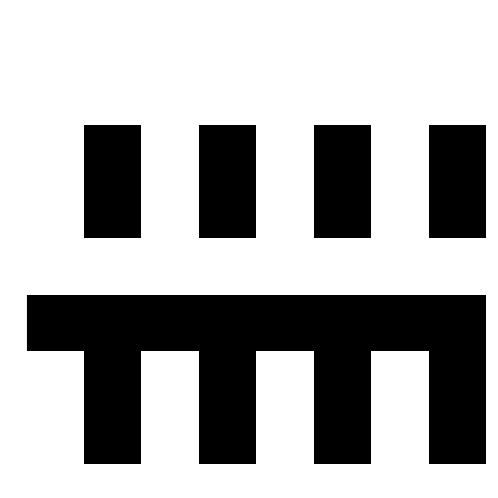

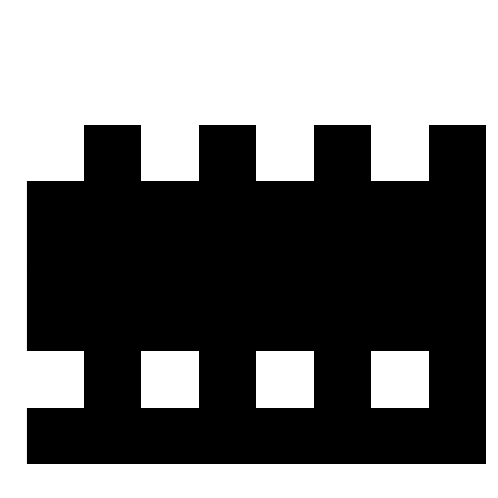

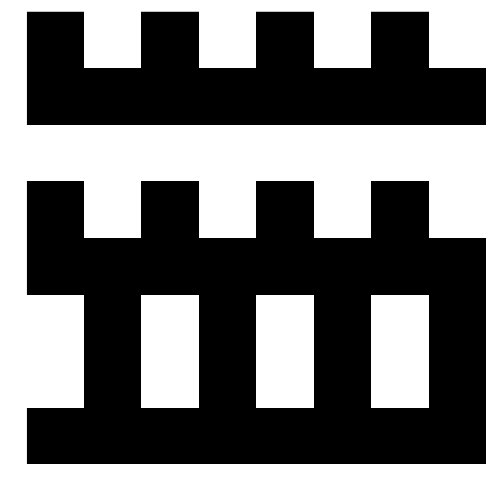

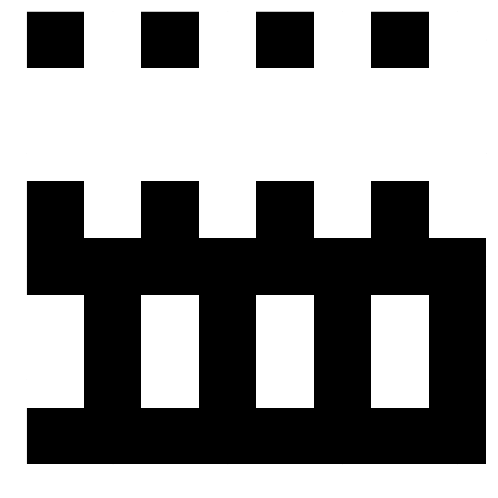

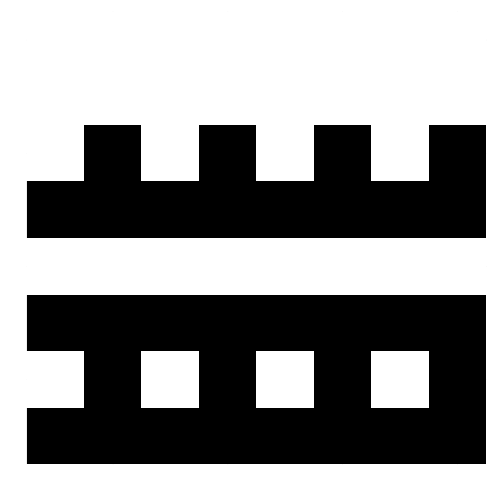

1024.0
1024.0
1024.0
1024.0
1024.0


In [28]:
k = lowest_cut_states(res[1], parameters)
l=0
for i in k
    l+=1
    binary_image_visualizer(reshape(i[1],8,8),500,"image_$(l)_t1",sav= false,d= true)
end

for o in k
    println(objective_func_G(o[1], parameters["images"]))
end

FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│     -1 │      1 │     -1 │      1 │      1 │     -1 │      1 │     -1 │
│      1 │     -1 │      1 │     -1 │     -1 │      1 │     -1 │      1 │
│     -1 │      1 │     -1 │      1 │      1 │     -1 │      1 │     -1 │
│      1 │     -1 │      1 │     -1 │     -1 │      1 │     -1 │      1 │
│      1 │     -1 │      1 │     -1 │     -1 │      1 │     -1 │      1 │
│     -1 │      1 │     -1 │      1 │      1 │     -1 │      1 │     -1 │
│      1 │     -1 │      1 │     -1 │     -1 │      1 │     -1 │      1 │
│     -1 │      1 │     -1 │      1 │      1 │     -1 │      1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘


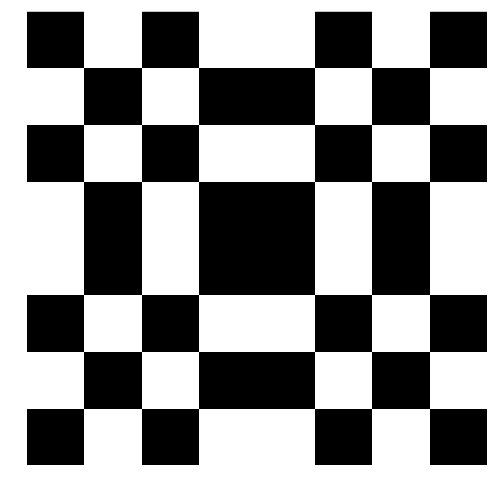

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │
│      1 │      1 │     -1 │      1 │     -1 │     -1 │      1 │     -1 │
│      1 │     -1 │      1 │      1 │     -1 │      1 │     -1 │     -1 │
│     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │
│     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │
│      1 │     -1 │      1 │      1 │     -1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │      1 │     -1 │     -1 │      1 │     -1 │
│      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ 

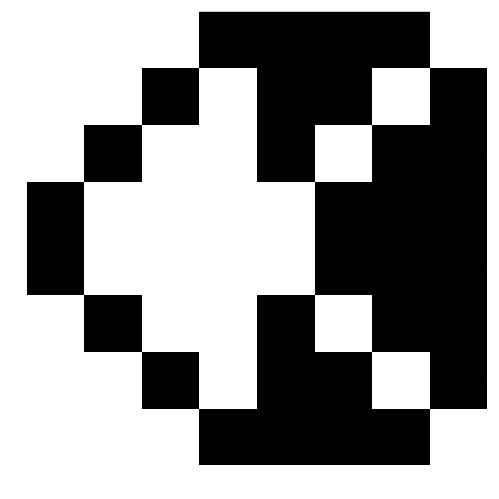

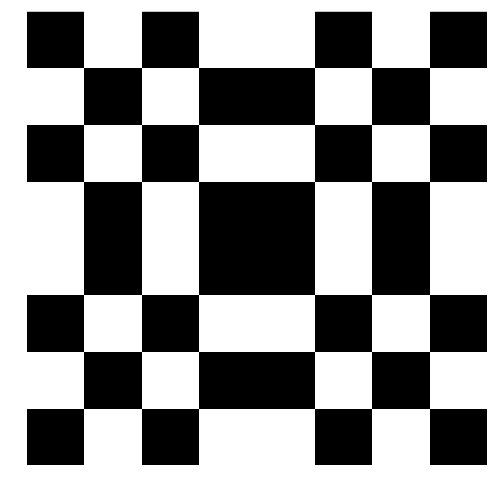

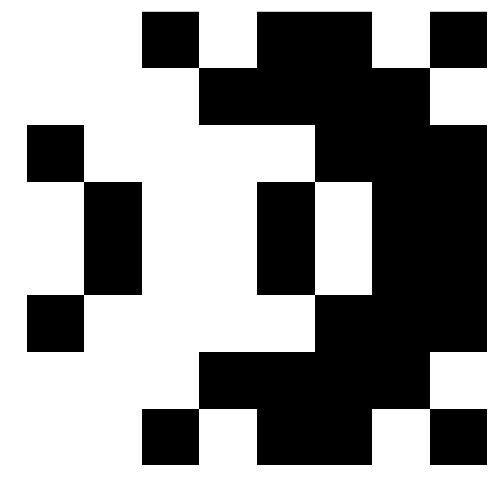

64-element Vector{Int8}:
  1
  1
  1
 -1
 -1
  1
  1
  1
  1
  1
 -1
  1
  1
  ⋮
 -1
 -1
  1
 -1
  1
 -1
 -1
 -1
 -1
 -1
 -1
  1

In [46]:
# Manually searching for lowest cut states, to see what V2 made
# Use the code below this cell to find the necessary floats to rotate by
pass = sol_finder(res[1], parameters)
binary_image_visualizer(reshape(pass[1][1],8,8),500,"image_$(l)_t1",k= false,d= true)
rots = lowest_cut_states(res[1], parameters, disp = true)
for i in 1:length(rots)
    println(Dice.cut(graph, rots[i][1]))
end
#= for i in parameters["images"]
    pretty_table(i)
end =#
println("dot between found")
println(rots[1][1]'*rots[2][1])

println("dot between found and unstored")
println(rots[1][1]'*vec(im_all[4]))
println(rots[2][1]'*vec(im_all[4]))

println(rots[1][1]'*vec(im_all[14]))
println(rots[2][1]'*vec(im_all[14]))

println("dot between found and stored")
println(rots[1][1]'*vec(im_all[18]))
println(rots[2][1]'*vec(im_all[18]))

l=0
for i in rots
    l+=1
    binary_image_visualizer(reshape(i[1],8,8),500,"image_$(l)_t1",k= true,d= true)
end

test_image = rots[1][1]

In [51]:
for i in 1:length(im_all)
    d = vec(im_all[i])' * test_image
    println("($(i), $(d))")
end

(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 0)
(15, 0)
(16, 0)
(17, 0)
(18, 0)
(19, 0)
(20, 0)
(21, 0)
(22, 0)
(23, 0)
(24, 0)
(25, 0)
(26, 0)
(27, 0)
(28, 0)
(29, 0)
(30, 0)
(31, 0)
(32, 0)
(33, 32)
(34, 0)
(35, 0)
(36, 0)
(37, 0)
(38, 0)
(39, 0)
(40, 0)
(41, 0)
(42, 0)
(43, 0)
(44, 0)
(45, 0)
(46, 32)
(47, 0)
(48, 0)
(49, 0)
(50, 0)
(51, 0)
(52, 0)
(53, 0)
(54, 0)
(55, 32)
(56, 0)
(57, 0)
(58, 0)
(59, 0)
(60, -32)
(61, 0)
(62, 0)
(63, 0)
(64, 0)


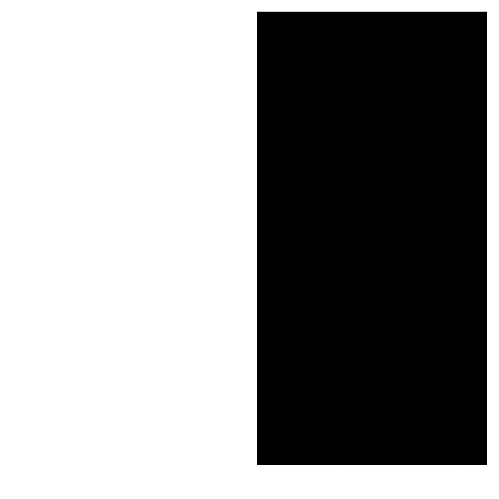

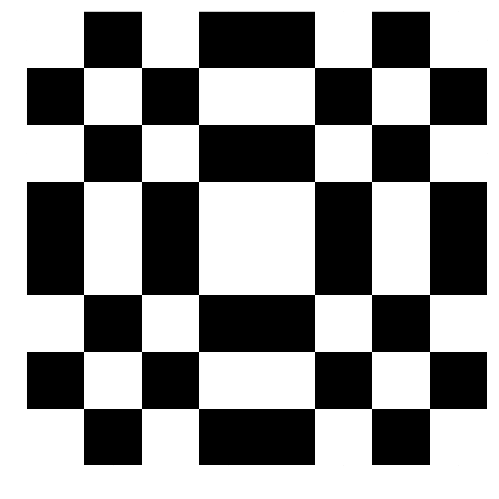

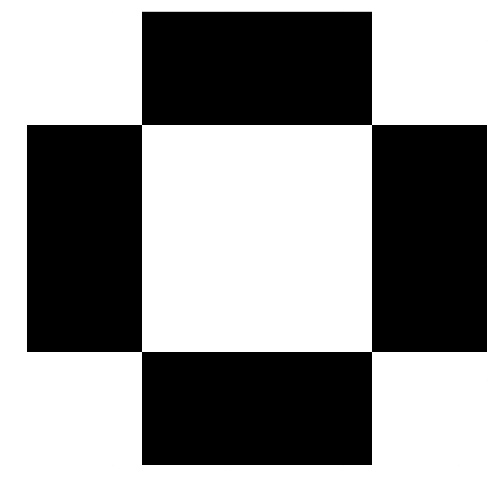

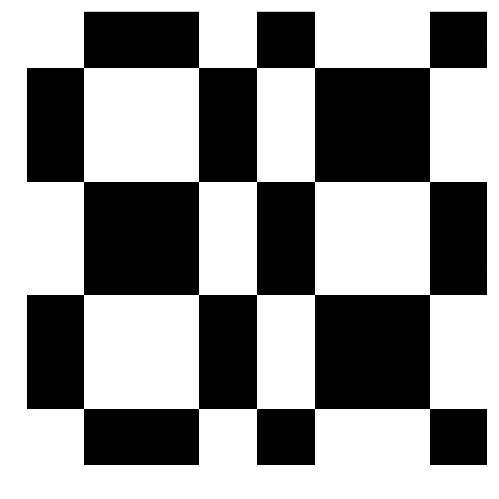



 step 1


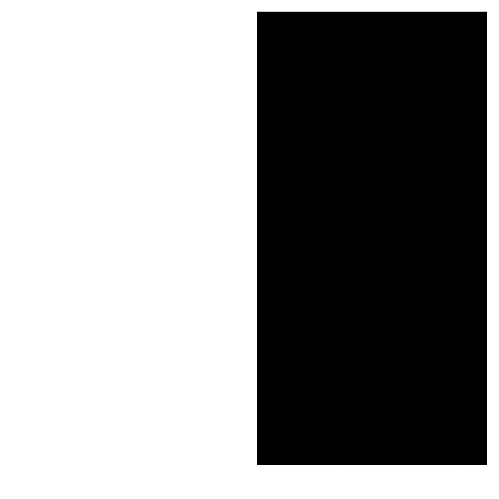



 step 2


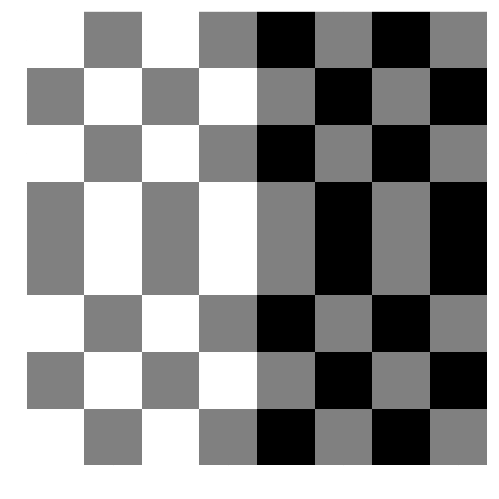



 step 3


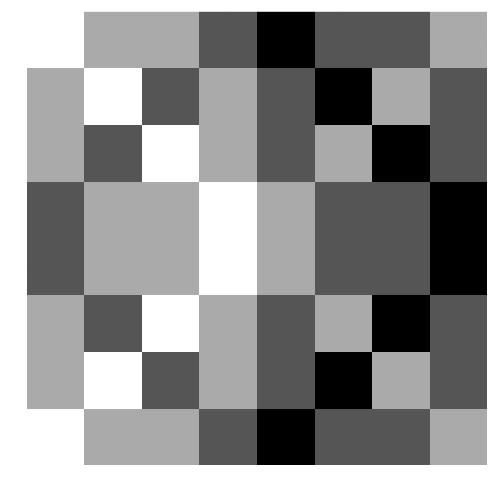



 step 4


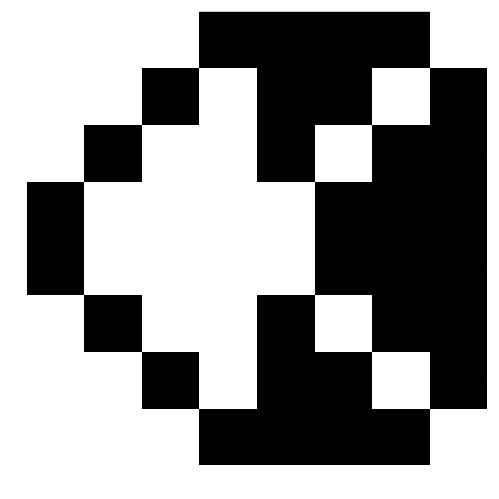

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│    1.0 │    1.0 │    1.0 │   -1.0 │   -1.0 │   -1.0 │   -1.0 │    1.0 │
│    1.0 │    1.0 │   -1.0 │    1.0 │   -1.0 │   -1.0 │    1.0 │   -1.0 │
│    1.0 │   -1.0 │    1.0 │    1.0 │   -1.0 │    1.0 │   -1.0 │   -1.0 │
│   -1.0 │    1.0 │    1.0 │    1.0 │    1.0 │   -1.0 │   -1.0 │   -1.0 │
│   -1.0 │    1.0 │    1.0 │    1.0 │    1.0 │   -1.0 │   -1.0 │   -1.0 │
│    1.0 │   -1.0 │    1.0 │    1.0 │   -1.0 │    1.0 │   -1.0 │   -1.0 │
│    1.0 │    1.0 │   -1.0 │    1.0 │   -1.0 │   -1.0 │    1.0 │   -1.0 │
│    1.0 │    1.0 │    1.0 │   -1.0 │   -1.0 │   -1.0 │   -1.0 │    1.0 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘


In [66]:
im_all_vec = vec.(im_all)
lin_combo = [33,46,55,60]
for i in lin_combo
    binary_image_visualizer(im_all[i], 500, "hi", d = true)
end

superpos = zeros(8,8)
println("\n\n step 1")
superpos += im_all[33]/2
binary_image_visualizer(superpos, 500, "hi", d = true)

println("\n\n step 2")
superpos += im_all[46]/2
binary_image_visualizer(superpos, 500, "hi", d = true)

println("\n\n step 3")
superpos += im_all[55]/2
binary_image_visualizer(superpos, 500, "hi", d = true)

println("\n\n step 4")
superpos -= im_all[60]/2
binary_image_visualizer(superpos, 500, "hi", d = true)

pretty_table(superpos)

In [1]:
l=0
for i in rots
    l+=1
    binary_image_visualizer(reshape(i[1],8,8),500,"image_$(l)_t1",k= true,d= true)
end

LoadError: UndefVarError: `rots` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [78]:
# Gives the points on the graph
function HN_cut_plotter(params, state, debug = false)
    rot = iterative_rotater_state(state,params)
    g = get_HN_graph(params["images"],params["scaling"])
    binary = [i[1] for i in rot]
    x = state[2]
    y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
    p = Plots.scatter(x,y)
    if debug
        x_p = p[1][1][:x]
        y_p = p[1][1][:y]
        o = sortperm(y_p)
        x_sorted = x_p[o]
        y_sorted = y_p[o]
        for i in 1:length(x_p)
            println("($(x_sorted[i]),$(y_sorted[i]))")
        end
    end
    return p
end

HN_cut_plotter_TEST (generic function with 2 methods)

(-0.6275340533796789,-1024.0)
(0.737446568918444,-1024.0)
(-0.05598728898912458,-1024.0)
(-0.6270284123951657,-976.0)
(0.04216368134079172,-976.0)
(-0.49451521124683634,-976.0)
(0.8034471800949272,-976.0)
(-0.5595338387014639,-976.0)
(-0.5588411762033909,-976.0)
(0.7404144099704384,-976.0)
(-0.047687958042571844,-976.0)
(-0.042793779299831726,-936.0)
(0.7969498391274396,-936.0)
(0.02256032987606988,-932.0)
(0.7415230957039157,-932.0)
(-0.5633314455316878,-928.0)
(-0.5593613456656137,-928.0)
(-0.5586710521221039,-928.0)
(-0.6216965169345791,-928.0)
(-0.4961843947252234,-928.0)
(-0.499576063765955,-888.0)
(-0.03642217837753658,-888.0)
(0.7429309814113568,-888.0)
(0.79525891413189,-888.0)
(-0.5582056133164582,-888.0)
(-0.6210337571181751,-888.0)
(0.017841216416917764,-888.0)
(-0.5657002820038439,-888.0)
(-0.5012566631787673,-848.0)
(0.017307710728821174,-848.0)
(0.7877394767433307,-848.0)
(-0.5442308501592662,-848.0)
(0.7551004667659649,-848.0)
(-0.02727137192388094,-848.0)
(-0.6030707640

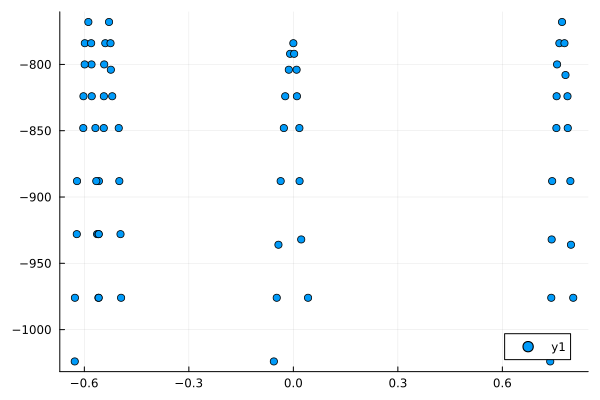

In [79]:
#Running, gives cont and cut. Take lowest cut cont values to see what solutions should be

HN_cut_plotter_TEST(parameters, res[1], true)

In [283]:
# Encodes objective function to maximize
function objective_func_G(state, images)
    s = 0
    for i in images
        for m in 1:length(state)
            for n in 1:length(state)
                s += state[m] * i[m] * state[n] * i[n]
            end
        end
    end
    return (s * 0.25)
end

objective_func_G (generic function with 1 method)

In [284]:
for i in parameters["images"]
    state = copy(vec(i))
    println(objective_func_G(state,parameters["images"]))
end

64.0
64.0
64.0
64.0
64.0


In [21]:
graph = get_HN_graph(parameters["images"],1.0)
r = iterative_rotater_state(res[1], parameters)
s = []
c_now = 999
for i in r
    c_i = cut(graph, i)
    if c_i < c_now
        c_now = c_i
    end
    #println(c_now)
end

for i in r
    c = cut(graph, i)
    if c == c_now
        push!(s,i)
    end
end

println(s)
for i in s 
    pretty_table(reshape(i[1],8,8))
end

lowest_cut_states(res[1], parameters, disp = true)

Any[(Int8[1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1], [-0.9396511444512918, 0.376802459203581, -0.9566791686776273, -0.9592418781438905, 0.2993237446605965, 0.3749446043481317, -0.9470697988607295, 0.36067332068875047, -0.9415340579758573, 0.29803677212436797, 0.3553495497114012, 0.43666260044643135, -1.0, -0.9460689077600262, -0.9509991656686152, 0.4371005830470347, 0.3467261727100164, 0.3199534043956116, 0.32673176089854294, -0.957355051870532, 0.3406441018324853, -0.9604125514814479, -0.9640655335923967, -0.972772766987819, -0.8855355398783324, -0.9478827041985749, 0.40241026378850586, -0.9059770170453985, 0.36476587272333405, -0.9329358059666699, 0.40280349753185307, 0.35637856340322305, 0.37773218907535777, 0.3202607038408951, 0.31706664518337213, -0.983114612240195, 0.37590997893275313, -0.954091433492

2-element Vector{Any}:
 (Int8[1, 1, -1, -1, 1, 1, -1, -1, -1, -1  …  1, 1, 1, 1, -1, -1, 1, 1, -1, -1], [-0.9396511444512918, 0.376802459203581, -0.9566791686776273, -0.9592418781438905, 0.2993237446605965, 0.3749446043481317, -0.9470697988607295, 0.36067332068875047, -0.9415340579758573, 0.29803677212436797  …  -0.9486894276275395, 0.2904740914552746, -0.9851718692420146, 0.35866844246006124, 0.31215489231698923, 0.39527724649826235, -0.9766688324410584, -0.9462110245371282, -0.8709495127187337, 0.40446719943930587])
 (Int8[1, -1, -1, -1, -1, -1, -1, 1, -1, 1  …  1, -1, 1, -1, 1, 1, 1, 1, -1, 1], [-0.23012523590656642, -0.9136716322516936, -0.24715326013290206, -0.2497159695991651, -0.9911503467946783, -0.9155294871071431, -0.2375438903160043, -0.9298007707665241, -0.2320081494311319, -0.9924373193309068  …  -0.23916351908281452, -1.0, -0.2756459606972892, -0.9318056489952136, -0.9783191991382854, -0.8951968449570122, -0.26714292389633343, -0.23668511599240283, -0.16142360417400825, -

In [20]:
function lowest_cut_states(state, params; disp = false)
    graph = get_HN_graph(params["images"],1.0)
    r = iterative_rotater_state(state, parameters)
    s = []
    c_now = 999
    for i in r
        c_i = cut(graph, i)
        if c_i < c_now
            c_now = c_i
        end
    end
    
    for i in r
        c = cut(graph, i)
        if c == c_now
            push!(s,i)
        end
    end

    if disp
        for i in s 
            pretty_table(reshape(i[1],8,8))
        end
    end
    return s
end

lowest_cut_states (generic function with 2 methods)

In [147]:
using PartitioningData
using Random
function generate_unique(N::Int, sample::Vector{Int})
    if length(sample) >= N
        error("Not enough space")
    end
    while true
        s = rand(1:N)
        if !(s in sample)
            return s
        end
    end
end

generate_unique (generic function with 1 method)

In [238]:
sim_time = 8
steps = 3000
im_all = orthogonal_image_generator(64)
println(length(im_all))
selected::Vector{Matrix{Int64}} = []
sl::Vector{Int64}=shuffle(1:64)[1:6]
for t in sl
    push!(selected, im_all[t])
end
g = get_HN_graph(selected,1.0)
parameters = Dict{String, Any}(
    "images" => selected,
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]#,(1,2,-1),(3,4,1)]
)
println(parameters["delta"])
@show sl

64
-0.0026666666666666666
sl = [19, 27, 29, 4, 60, 24]


6-element Vector{Int64}:
 19
 27
 29
  4
 60
 24

In [226]:
#=for i in parameters["images"]
    pretty_table(i)
end=#

In [230]:
conv = 0
elp = @elapsed begin
    for i in 1:100
        r = HN_og(parameters)
        if (reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            conv +=1 
        end
    end
end
println(conv)
println("took $elp seconds")

23
took 2.094194125 seconds


In [242]:
function iterative_rotater_state_test(state, params, debug = false)
    rotations = []
    for i in state[2]
        rotated = Dice.realign_hybrid(state, 1+i)
        if debug
            println("rotated by $i")
            pretty_table(reshape(rotated[1],size(params["images"][1],1),size(params["images"][1],1)))
        end
        push!(rotations, (rotated,i))
    end
    for i in state[2]
        rotated = Dice.realign_hybrid(state, 3+i)
        if debug
            println("rotated by $i")
            pretty_table(reshape(rotated[1],size(params["images"][1],1),size(params["images"][1],1)))
        end
        push!(rotations, (rotated,i))
    end
    return rotations
end

iterative_rotater_state_test (generic function with 2 methods)

In [243]:
function HN_cut_plotter_test(params, state)
    rot = [i[2] for i in iterative_rotater_state(state,params)]
    g = get_HN_graph(params["images"],params["scaling"])
    binary = [i[1] for i in rot]
    x = state[2]
    y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
    p = scatter(x,y)
    return p
end

HN_cut_plotter_test (generic function with 1 method)

In [239]:
conv = 0
twos = 0 
others = 0
elp = @elapsed begin
    for i in 1:100
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv += 1
        end
        if sol_count == 2
            twos += 1 
        end
        if sol_count > 2
            others += 1 
        end
    end
end
println("Number of convs: $(conv)")
println("Number of twos: $(twos)")
println("Number of more than two sols: $(others)")
println("took $elp seconds")

Number of convs: 99
Number of twos: 85
Number of more than two sols: 0
took 7.966499958 seconds


In [175]:
#WARNING will generate a bunch of .dat files
r = HN_Solver(parameters)

pretty_table(reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))

conv = 0
elp = @elapsed begin
    for i in 1:10
        r = HN_Solver_Traj(parameters)
        rs = iterative_rotater_state(r[1], parameters)
        f = false
        for st in rs
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                conv +=1 
                f = true
                break
            end
        end
        if !f
            println("FAILED AT $i")
            save_trajectories(r[2], "8by8_len_6","iter_$i")
            pretty_table(reshape(r[1][1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
        end
    end
end
println(conv)
println("took $elp seconds")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │     -1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FAILED AT 1
File 8by8_len_6_1_iter_1.dat is generated
┌────────┬────────┬────────┬────────┬────────┬────────┬───

In [448]:
#Running
res = HN_Solver_Traj(parameters, true)
save_trajectories(res[2], "8by8","len8_t02")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
File 8by8_1_len8_t02.dat is generated


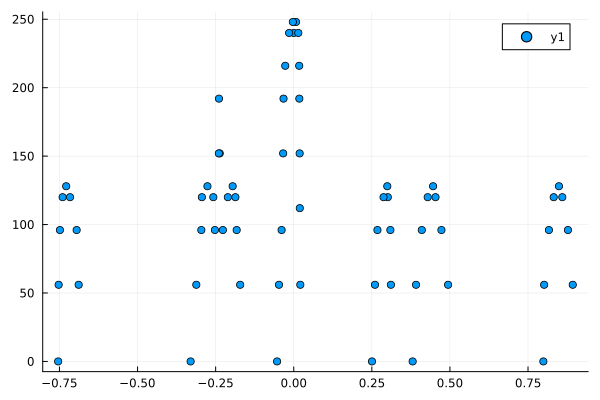

In [431]:
HN_cut_plotter(parameters, res[1])

In [434]:
sol_finder(res[1], parameters)

Any[]

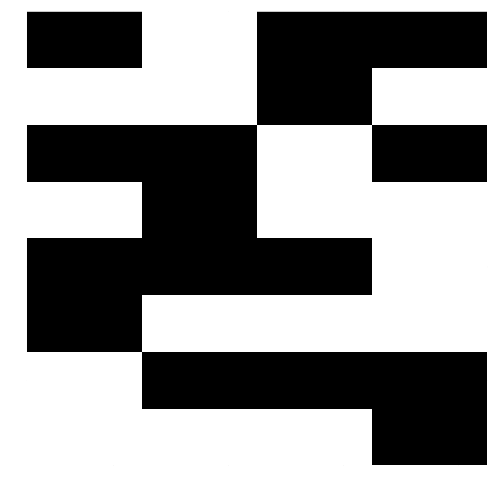

In [465]:
p = heatmap(reshape(res[1][1],8,8);
            # framestyle = :box, # doesn't work
            # framestyle = :none, # no boundary
            legend = false,
            color = cgrad([:black, :white]),
            axis = false,
            size = (500, 500))

# Save the plot to a PNG file
savefig(p, "binary_matrix_large.png")

# Display the plot if running in a script
display(p)